# Simple Linear Regression

In [2]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

In [3]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    '''the error from predicting beta * x_i + alpha
    when the actual value is y_i
    '''
    return predict(alpha, beta, x_i) - y_i

In [4]:
from linearalgebra import Vector
from typing import Tuple
from stati import correlation, standard_deviation, mean

In [5]:
def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
                for x_i, y_i in zip(x, y))

In [6]:
def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    '''Given two vector x and y,
    find the least-square values of alpha and beta'''
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [7]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in  x]

assert least_squares_fit(x, y) == (-5, 3)

In [8]:
age = [1,2,3,4]
weight = [14, 21, 28, 35]
least_squares_fit(age, weight)

(7.0, 7.0)

In [9]:
from stati import num_friends_good, daily_minutes_good
from matplotlib import pyplot as plt
import numpy as np

In [10]:
alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
print(alpha, beta)
m, b = np.polyfit(num_friends_good, daily_minutes_good, 1)
print(m, b)
num_friends = np.array(num_friends_good, dtype=float)
daily_mint = np.array(daily_minutes_good, dtype=float)

22.94755241346903 0.903865945605865
0.9038659456058701 22.947552413469005


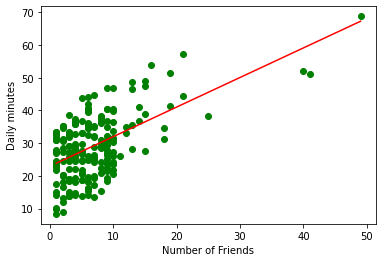

In [11]:
plt.scatter(num_friends_good, daily_minutes_good, color='green')
plt.plot(num_friends_good, m*num_friends + b,  color='red')
plt.xlabel('Number of Friends')
plt.ylabel('Daily minutes')
plt.show()

In [12]:
from stati import de_mean

In [13]:
def total_sum_of_squares(y: Vector) -> float:
    '''the total squared variation of y_i from their mean'''
    return sum(v ** 2 for v in de_mean(y))

In [14]:
def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    '''the fraction of variation in y captured by the model,
    which equals
    1 - the fraction of variation in y not captured by the model'''
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y)/total_sum_of_squares(y))

In [15]:
rsq = r_squared(alpha, beta, num_friends_good, daily_minutes_good)

In [110]:
print(rsq)

0.3291078377836305


# Using Gradient Descent

In [16]:
import random 
import tqdm
from GradientDescent import gradient_step

In [18]:
num_epochs = 10000
random.seed(0)

guess = [random.random(), random.random()]
learning_rate = 0.0001

with tqdm.trange(num_epochs) as t:
    for _ in t:
        alpha, beta = guess

        # partial derivative of loss with respect to alpha 
        grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                    for x_i, y_i in zip(num_friends_good, daily_minutes_good))

        # partial derivative of loss with respect to beta
        grad_b = sum(2*error(alpha, beta, x_i, y_i) * x_i
                    for x_i, y_i in zip(num_friends_good, daily_minutes_good)) 

        loss = sum_of_sqerrors(alpha, beta, num_friends_good,
                            daily_minutes_good)

        # compute loss to stick in the tqdm description

        t.set_description(f'loss: {loss:.3f}')
        #finally, update the guess

        guess = gradient_step(guess, [grad_a, grad_b], learning_rate) 

loss: inf:   2%|▏         | 233/10000 [00:00<00:35, 274.27it/s]


OverflowError: (34, 'Result too large')